In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [2]:
def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

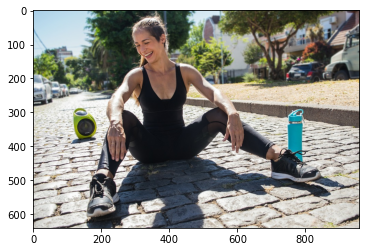

In [3]:
img = cv2.imread("girlf.jpg") 

image=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [4]:
# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)

detector = vision.PoseLandmarker.create_from_options(options)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [5]:
image = mp.Image.create_from_file("girlf.jpg")

# image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# image = mp.Image(image_format=mp.ImageFormat.SRGB, data=image )

detection_result = detector.detect(image)

In [6]:
# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result) 

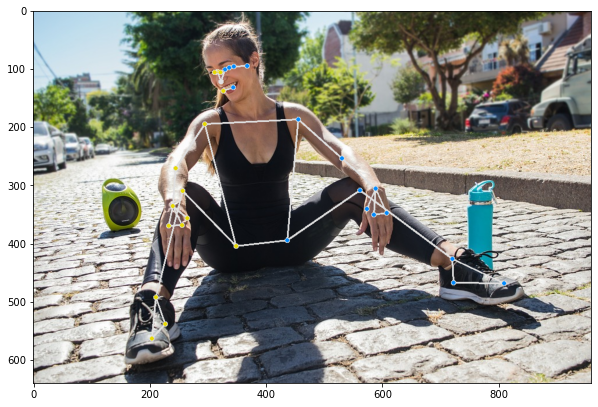

In [7]:
image= annotated_image

plt.figure(figsize=(10,10))
plt.imshow(image)

In [32]:
image = cv2.imread("girlf.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [15]:
# image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image = mp.Image(image_format=mp.ImageFormat.SRGB, data=image )

detection_result = detector.detect(image)

In [16]:
pose_landmarks_list = detection_result.pose_landmarks
len(pose_landmarks_list)

1

In [19]:
pose_landmarks = pose_landmarks_list[0]
len(pose_landmarks)

33

In [25]:
keys=[
    mp_pose.PoseLandmark.LEFT_WRIST.value,
    mp_pose.PoseLandmark.RIGHT_WRIST.value,
    mp_pose.PoseLandmark.MOUTH_LEFT,
    mp_pose.PoseLandmark.MOUTH_RIGHT,
]

keys=[9,10,11,12,15,16]
landmarks=[pose_landmarks[key] for key in keys]

In [27]:
landmarks=pose_landmarks

pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
pose_landmarks_proto.landmark.extend([
    landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in landmarks
])


annotated_image = np.copy(image_rgb)
solutions.drawing_utils.draw_landmarks(
    annotated_image,
    pose_landmarks_proto,
    solutions.pose.POSE_CONNECTIONS,
    solutions.drawing_styles.get_default_pose_landmarks_style())

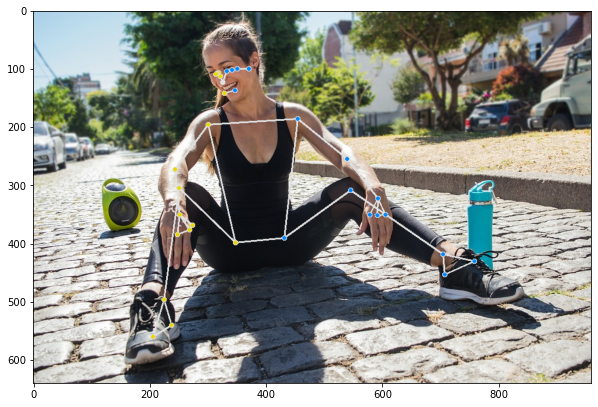

In [28]:
image= annotated_image
# image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(image)

In [35]:
mpPose=mp_pose
specific_landmarks = [mpPose.PoseLandmark.MOUTH_RIGHT,
                        mpPose.PoseLandmark.MOUTH_LEFT,
                        mpPose.PoseLandmark.RIGHT_WRIST,
                        mpPose.PoseLandmark.LEFT_WRIST,
                        ]

# Render the specific landmark points
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2)

keys=[9,10,11,12,15,16]
# for landmark in specific_landmarks:
for key in keys:
    landmark_point = pose_landmarks[key]
    x_px, y_px = int(landmark_point.x * image.shape[1]), int(landmark_point.y * image.shape[0])
    cv2.circle(image, (x_px, y_px), drawing_spec.circle_radius, drawing_spec.color, drawing_spec.thickness)



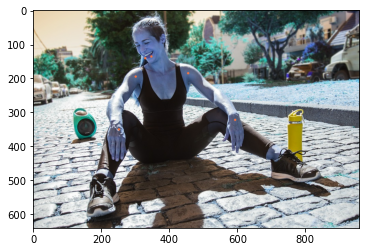

In [36]:
plt.imshow(image)

In [8]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Initialize MediaPipe Pose model
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

image = cv2.imread("girlf.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image with Pose model
results = pose.process(image_rgb)

# Visualize the full body skeleton
if results.pose_landmarks:
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)



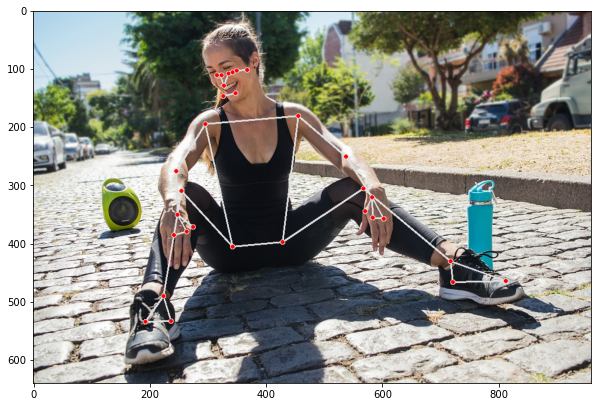

In [10]:
# image= annotated_image
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(image)

In [12]:
lms=results.pose_landmarks
len(lms)

TypeError: object of type 'NormalizedLandmarkList' has no len()